In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import sklearn

In [ ]:
df=pd.read_csv('housing.csv')

In [ ]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [ ]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
train_df=x_train.join(y_train)

In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14,4412,924.0,2698,891,4.7027,<1H OCEAN,227600
2057,-119.63,36.64,33,1036,181.0,620,174,3.4107,INLAND,110400
6453,-118.06,34.12,25,3891,848.0,1848,759,3.6639,INLAND,248100
4619,-118.31,34.07,28,2362,949.0,2759,894,2.2364,<1H OCEAN,305600
15266,-117.27,33.04,27,1839,392.0,1302,404,3.5500,NEAR OCEAN,214600
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24,2991,500.0,1437,453,5.4286,<1H OCEAN,273400
12081,-117.54,33.76,5,5846,1035.0,3258,1001,4.7965,<1H OCEAN,160800
5447,-118.42,34.01,42,1594,369.0,952,362,3.0990,<1H OCEAN,335400
866,-122.04,37.57,12,5719,1064.0,3436,1057,5.2879,NEAR BAY,231200


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

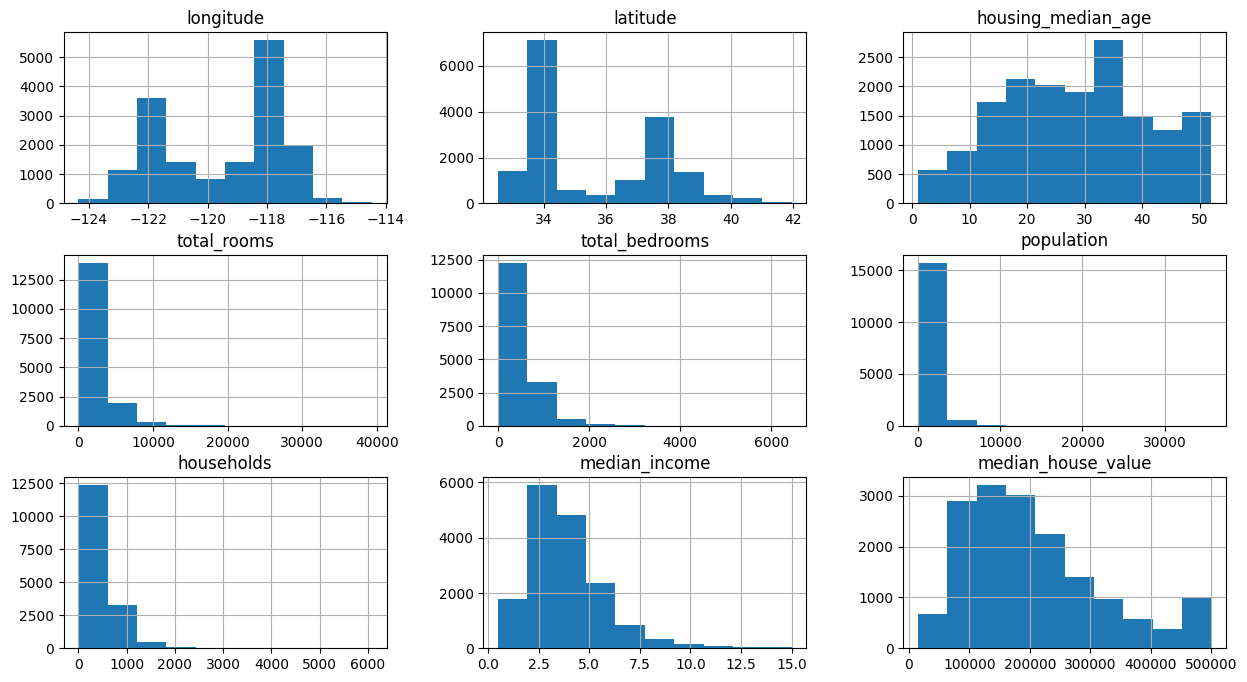

In [ ]:
train_df.hist(figsize=(15,8))

In [ ]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 17727 to 15948
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  int64  
 3   total_rooms         16346 non-null  int64  
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  int64  
 6   households          16346 non-null  int64  
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.9+ MB


In [ ]:
train_df1=train_df.drop('ocean_proximity',axis=1)
train_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17727,-121.80,37.32,14,4412,924.0,2698,891,4.7027,227600
2057,-119.63,36.64,33,1036,181.0,620,174,3.4107,110400
6453,-118.06,34.12,25,3891,848.0,1848,759,3.6639,248100
4619,-118.31,34.07,28,2362,949.0,2759,894,2.2364,305600
15266,-117.27,33.04,27,1839,392.0,1302,404,3.5500,214600


In [ ]:
#to find the corelation between columns
train_df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


<Axes: >

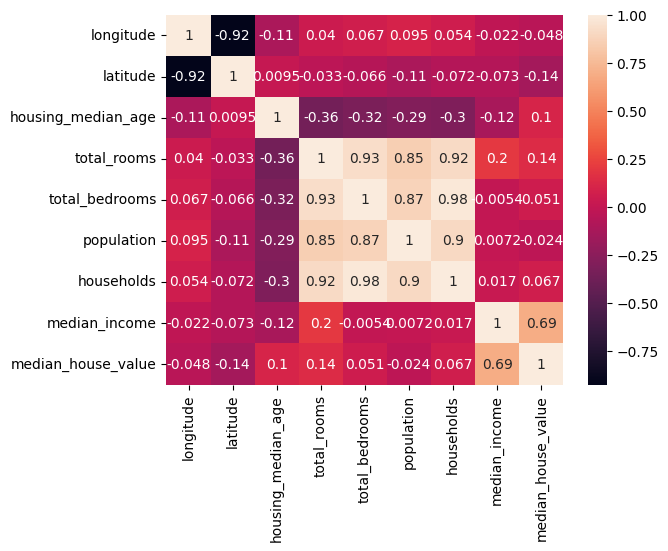

In [ ]:
#plt.figure(figsize=(15,8))
sns.heatmap(train_df1.corr(),annot=True)  #if 1 is shown, it shows strong relation..and other shows how it is related to each other

<Axes: xlabel='latitude', ylabel='longitude'>

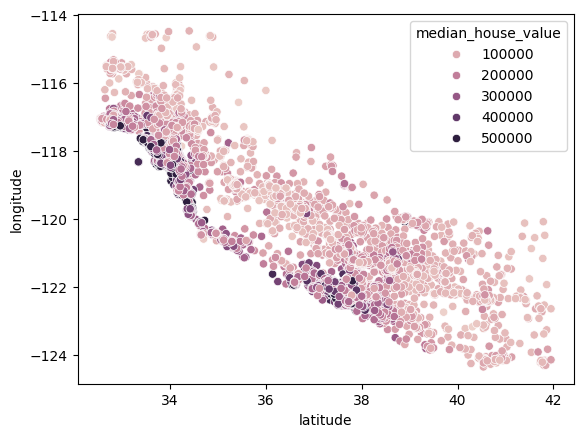

In [ ]:
sns.scatterplot(x='latitude',y='longitude',data=train_df1,hue='median_house_value')  #hue is to add one more attribute to the plot

In [ ]:
from sklearn.linear_model import LinearRegression
x=train_df1.drop('median_house_value',axis=1)
y=train_df1['median_house_value']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_test)
print(y_pred)

[234142.49936667 200242.98621344 309403.15791901 ... 221891.8831073
 276464.16812504 119332.20900979]


In [ ]:
model.score(x_test,y_test)

0.6520590952926204

In [24]:
from sklearn.metrics import r2_score
#calculate evaluation metrics by finding r2 score, which is proportion of the variance in the target
r2=r2_score(y_test,y_pred)
print("R_squared:",r2)

R_squared: 0.6520590952926204
